In [4]:
import networkx as nx
G=nx.DiGraph()

G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

In [2]:
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import json
import networkx as nx

In [5]:
print G.number_of_nodes()
print G.number_of_edges()

8
2


In [6]:
print G.nodes()
print G.edges()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']
[(1, 2), (1, 3)]


In [7]:
G.add_edge(2,1)

In [8]:
print G.edges()

[(1, 2), (1, 3), (2, 1)]


In [10]:
G[1]

{2: {}, 3: {}}

In [13]:
G.node[1]['name']="2D-map"
G.node[2]['name']="3D-zonal-map"

In [14]:
G.nodes()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [21]:
G.node[2]['name']

'3D-zonal-map'

In [40]:
G.nodes()

['a', 1, 2, 3, 4, 'spam']

In [23]:
G.successors(1)


[2, 3]

In [24]:
G.successors(2)

[1]

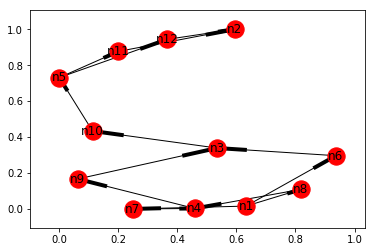

[u'n12',
 u'n10',
 u'n11',
 u'n8',
 u'n9',
 u'n1',
 u'n2',
 u'n3',
 u'n4',
 u'n5',
 u'n6',
 u'n7']

In [116]:
import matplotlib.pyplot as plt

nx.draw_networkx(G, prog='neato')
plt.show()
G.nodes()

In [99]:
G.remove_nodes_from('mps')

In [39]:
G.add_node(4, name="4D-map")

In [41]:
G.node[4]

{'name': '4D-map'}

In [44]:
G.nodes(name=True)

TypeError: nodes() got an unexpected keyword argument 'name'

In [46]:
nx.has_path(G,2,1)

True

In [49]:
nx.has_path(G,3,1)

False

In [4]:
import json
import networkx as nx
G=nx.DiGraph()

PROM_DIR = "/home/soc/Downloads/prom/prom-6.6-all-platforms/"
jsoned = ""
with open(PROM_DIR + "jsoned_workflow_1.txt", "rt") as fin:
    for line in fin:
        jsoned = jsoned + line
jsoned = json.loads(jsoned)
page = jsoned['pnml']['net']['page']

for p in page['place']:
    print p['@id']
    G.add_node(p['@id'], name = p['name']['text']['$'], sort = 'place')

for t in page['transition']:
    print t['@id']
    G.add_node(t['@id'], name = t['name']['text']['$'], sort = 'transition')
    
for a in page['arc']:
    print a['@id']
    G.add_edge(a['@source'], a['@target'], name = a['name']['text']['$'], sort = 'arc')

n1
n2
n3
n4
n5
n6
n7
n8
n9
n10
n11
n12
n13
arc14
arc15
arc16
arc17
arc18
arc19
arc20
arc21
arc22
arc23
arc24
arc25
arc26
arc27
arc28
arc29


In [5]:
import itertools
test_res = set(n for u,v,d in G.edges_iter(data=True)
               if d['sort']=='arc'
               for n in (u, v)
               if G.node[n]['sort']=='place')

print str(test_res)
comb = list(itertools.combinations(test_res,2))
uow = []
print comb
for i in comb:
    for j in G.successors(i[0]):
        if nx.has_path(G, j, i[1]):
            print (i[0], i[1])
            uow.append((i[0], i[1]))
            break
print uow

set([u'n1', u'n2', u'n3', u'n4', u'n5'])
[(u'n1', u'n2'), (u'n1', u'n3'), (u'n1', u'n4'), (u'n1', u'n5'), (u'n2', u'n3'), (u'n2', u'n4'), (u'n2', u'n5'), (u'n3', u'n4'), (u'n3', u'n5'), (u'n4', u'n5')]
(u'n1', u'n2')
(u'n1', u'n3')
(u'n1', u'n4')
(u'n1', u'n5')
(u'n3', u'n5')
(u'n4', u'n5')
[(u'n1', u'n2'), (u'n1', u'n3'), (u'n1', u'n4'), (u'n1', u'n5'), (u'n3', u'n5'), (u'n4', u'n5')]


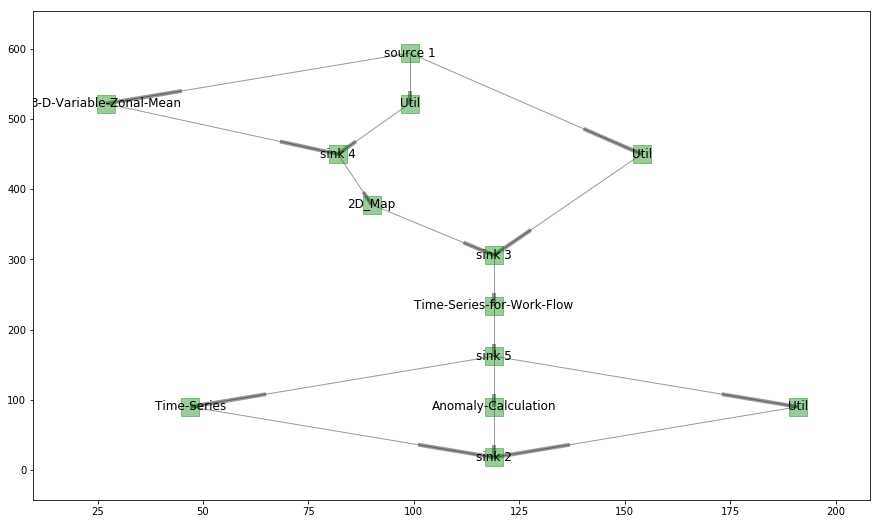

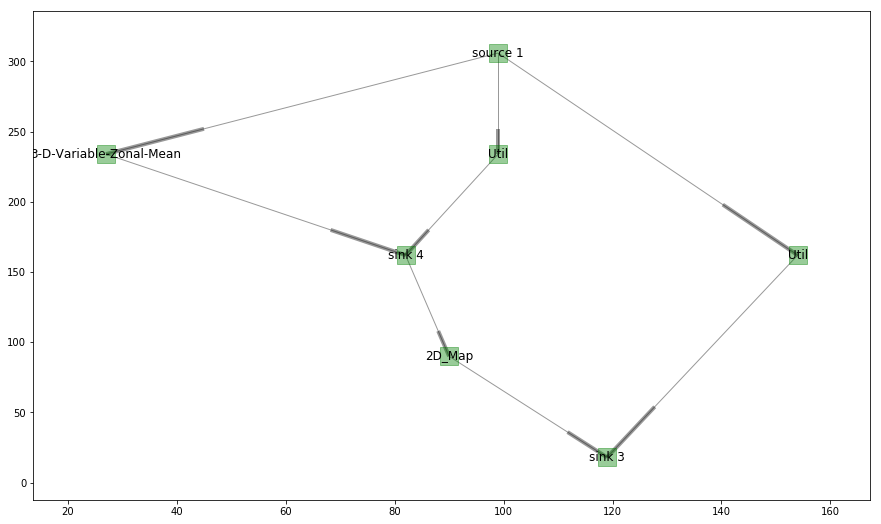

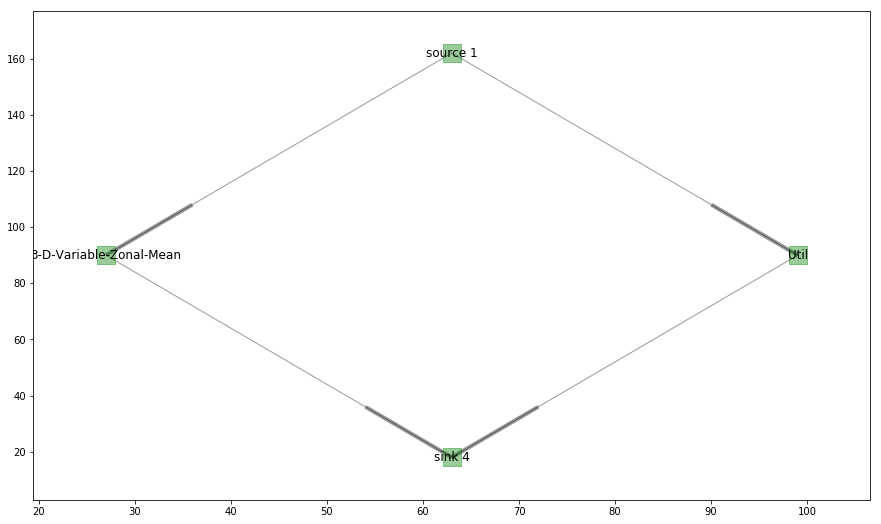

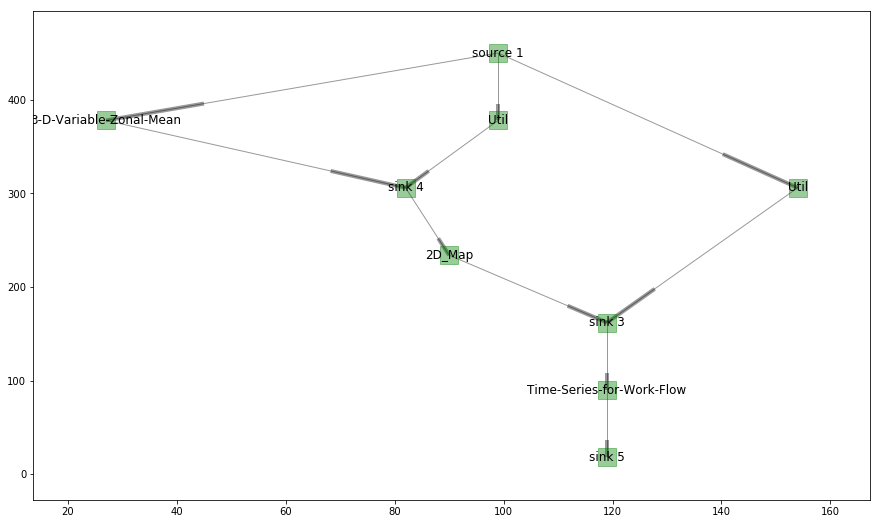

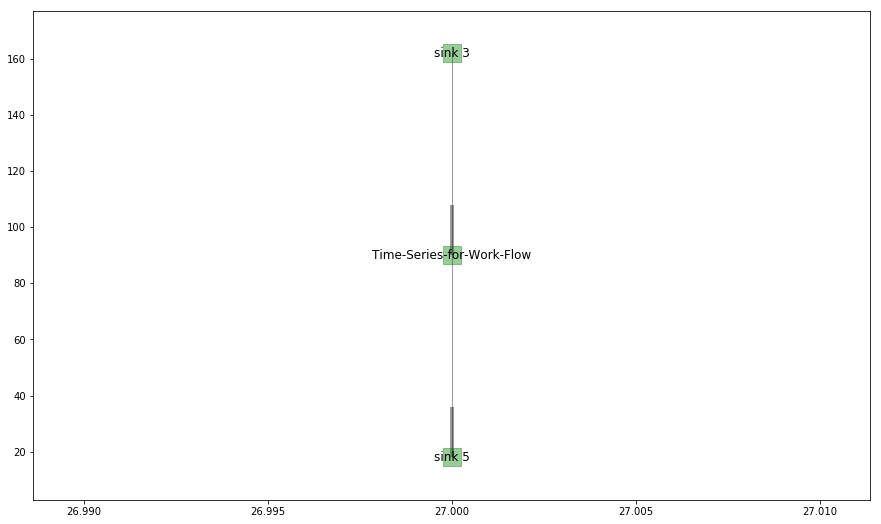

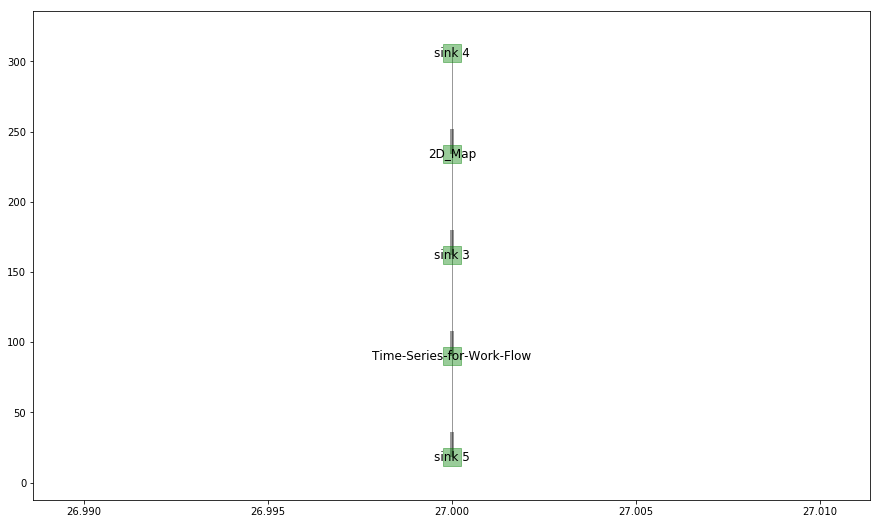

{"all_uows": [{"directed": true, "graph": {}, "nodes": [{"sort": "transition", "name": "Time-Series", "id": "n12"}, {"sort": "transition", "name": "Anomaly-Calculation", "id": "n13"}, {"sort": "transition", "name": "Time-Series-for-Work-Flow", "id": "n10"}, {"sort": "transition", "name": "tau from tree", "id": "n11"}, {"sort": "transition", "name": "3-D-Variable-Zonal-Mean", "id": "n8"}, {"sort": "transition", "name": "2D_Map", "id": "n9"}, {"sort": "place", "name": "source 1", "id": "n1"}, {"sort": "place", "name": "sink 2", "id": "n2"}, {"sort": "place", "name": "sink 3", "id": "n3"}, {"sort": "place", "name": "sink 4", "id": "n4"}, {"sort": "place", "name": "sink 5", "id": "n5"}, {"sort": "transition", "name": "tau from tree", "id": "n6"}, {"sort": "transition", "name": "tau from tree", "id": "n7"}], "links": [{"sort": "arc", "source": 0, "name": 1, "target": 7}, {"sort": "arc", "source": 1, "name": 1, "target": 7}, {"sort": "arc", "source": 2, "name": 1, "target": 10}, {"sort": "ar

In [76]:
from networkx.readwrite import json_graph
import pygraphviz

jsonRes = {"all_uows" : []}
for pair in uow:
    sub = nx.DiGraph()
    for path in nx.all_simple_paths(G, source=pair[0], target=pair[1]):         
        for node in path:
            sub.add_node(node)
    subG = nx.subgraph(G, sub)
    subG.nodes()
    tmpDict = {}
    for node in subG.nodes_iter():
        if subG.node[node]['name'] != 'tau from tree':
            tmpDict[node]=subG.node[node]['name']
        else:
            tmpDict[node]='Util'
        #print subG.node[node]['name']
    position = nx.nx_agraph.graphviz_layout(subG, prog='dot')
    nx.draw_networkx(subG, labels=tmpDict, pos=position, node_shape='s', node_color='g', alpha=0.4, node_size=300)
    #plt.set_size_inches(18.5, 10.5)
    plt.show()    
    jsonTmp = json_graph.node_link_data(subG)
    jsonRes['all_uows'].append(jsonTmp)
    
print json.dumps(jsonRes)

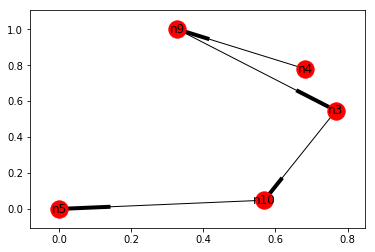

[u'n9', u'n10', u'n3', u'n4', u'n5']
{"directed": true, "graph": {}, "nodes": [{"sort": "transition", "name": "2D_Map", "id": "n9"}, {"sort": "transition", "name": "Time-Series-for-Work-Flow", "id": "n10"}, {"sort": "place", "name": "sink 3", "id": "n3"}, {"sort": "place", "name": "sink 4", "id": "n4"}, {"sort": "place", "name": "sink 5", "id": "n5"}], "links": [{"sort": "arc", "source": 0, "name": 1, "target": 2}, {"sort": "arc", "source": 1, "name": 1, "target": 4}, {"sort": "arc", "source": 2, "name": 1, "target": 1}, {"sort": "arc", "source": 3, "name": 1, "target": 0}], "multigraph": false}
{u'n9': (57.948, 42.651), u'n10': (-51.503, -51.007), u'n3': (7.6134, -9.2504), u'n4': (103.11, 98.949), u'n5': (-117.17, -81.343)}


In [41]:
from networkx.readwrite import json_graph
import pygraphviz

subG = nx.subgraph(G, sub)
nx.draw_networkx(subG, with_labels=True)
plt.show()
print subG.nodes()

jsonRes = json_graph.node_link_data(subG)
print json.dumps(jsonRes)

pos = nx.nx_agraph.graphviz_layout(subG)
print pos

In [75]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


In [25]:
for node in subG.nodes_iter():
    print subG.node[node]['name']

2D_Map
Time-Series-for-Work-Flow
sink 3
sink 4
sink 5


In [20]:
subG.nodes(data=True)

[(u'n9', {'name': u'2D_Map', 'sort': 'transition'}),
 (u'n10', {'name': u'Time-Series-for-Work-Flow', 'sort': 'transition'}),
 (u'n3', {'name': u'sink 3', 'sort': 'place'}),
 (u'n4', {'name': u'sink 4', 'sort': 'place'}),
 (u'n5', {'name': u'sink 5', 'sort': 'place'})]